In [17]:
import pandas as pd 

pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv('../data/선택된피처/dataset1_general_raw+standard.csv', encoding='CP949')
df.drop(columns='Unnamed: 0', inplace=True)
df 

,회사명,거래소코드,회계년도,상장일,상장폐지일_x,부실기업1,부실기업2,부실기업,업종,경기민감도,총자본증가율,종업원수증가율,총자본정상영업이익률,자기자본정상영업이익률,금융비용부담률,수지비율,CASH FLOW 대 총자본비율,총자본투자효율,순운전자본회전률
0,(주)CMG제약,58820,201112,200108,NaN,0,0,0,제조업,1,13.166482,4.65,2.37,3.51,0.80,108.35,-15.65,12.72,0.86
1,(주)CMG제약,58820,201212,200108,NaN,0,0,0,제조업,1,109.147119,-0.74,-9.96,-16.95,2.53,140.55,-3.62,0.47,0.42
2,(주)CMG제약,58820,201312,200108,NaN,0,0,0,제조업,1,-2.093352,1.49,1.40,1.96,1.65,98.55,-4.93,12.51,0.42
3,(주)CMG제약,58820,201412,200108,NaN,0,0,0,제조업,1,3.855597,20.59,0.78,0.90,-0.65,99.32,-2.77,12.16,0.56
4,(주)CMG제약,58820,201512,200108,NaN,0,0,0,제조업,1,-2.644307,-4.88,-4.49,-5.37,-0.11,113.24,2.77,7.63,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,흥아해운(주),3280,201312,197606,NaN,0,0,0,운수 및 창고업,0,7.026008,-3.78,3.50,13.80,1.84,95.90,4.71,14.13,2.02
12739,흥아해운(주),3280,201412,197606,NaN,0,0,0,운수 및 창고업,0,13.690307,9.90,3.04,11.51,1.66,97.18,2.10,13.89,2.03
12740,흥아해운(주),3280,201512,197606,NaN,0,0,0,운수 및 창고업,0,21.933460,7.68,2.95,12.48,2.22,98.11,2.17,13.11,2.15
12741,흥아해운(주),3280,201612,197606,NaN,0,0,0,운수 및 창고업,0,21.081715,15.87,0.67,3.23,3.21,100.55,1.70,10.98,2.19


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                12743 non-null  object 
 1   거래소코드              12743 non-null  int64  
 2   회계년도               12743 non-null  int64  
 3   상장일                12743 non-null  int64  
 4   상장폐지일_x            455 non-null    float64
 5   부실기업1              12743 non-null  int64  
 6   부실기업2              12743 non-null  int64  
 7   부실기업               12743 non-null  int64  
 8   업종                 12743 non-null  object 
 9   경기민감도              12743 non-null  int64  
 10  총자본증가율             12743 non-null  float64
 11  종업원수증가율            12743 non-null  float64
 12  총자본정상영업이익률         12743 non-null  float64
 13  자기자본정상영업이익률        12743 non-null  float64
 14  금융비용부담률            12743 non-null  float64
 15  수지비율               12743 non-null  float64
 16  CASH FLOW 대 총자본비율  127

In [20]:
### 컬럼별 인덱스 번호 확인
for i, col in enumerate(df):
    print(i, col)

0 회사명
1 거래소코드
2 회계년도
3 상장일
4 상장폐지일_x
5 부실기업1
6 부실기업2
7 부실기업
8 업종
9 경기민감도
10 총자본증가율
11 종업원수증가율
12 총자본정상영업이익률
13 자기자본정상영업이익률
14 금융비용부담률
15 수지비율
16 CASH FLOW 대 총자본비율
17 총자본투자효율
18 순운전자본회전률


### 독립변수 및 종속변수 컬럼 지정

In [21]:
data = df.iloc[:, 10:]
target = df.iloc[:, 7]

## 데이터 랜덤 분할

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
          총자본증가율  종업원수증가율  총자본정상영업이익률  자기자본정상영업이익률  금융비용부담률    수지비율  \
4015    1.516375    -4.28        6.92        17.30     0.80   96.10   
10105  -9.093296   -14.29        1.65         4.19    12.73  100.63   
7132   -4.750046     1.93        1.50         7.18     2.41   99.15   
8291   13.299888    -4.85        5.58         8.76    -0.31   91.11   
5389    3.817423     9.29       -7.18       -13.61     0.66  109.59   
...          ...      ...         ...          ...      ...     ...   
8134   -0.103645    -5.08        2.28         2.65    -0.88   92.61   
4989  -18.246642   -14.75      -15.57       -18.01    -0.61  119.78   
6962   50.752395    -6.70        5.85        14.08     0.76   95.73   
2448   14.626300    -1.37        3.63         5.97     0.57   97.93   
474    19.033482    10.81       14.21        16.84    -1.22   82.03   

       CASH FLOW 대 총자본비율  총자본투자효율  순운전자본회전률  
4015                5.36    29.88      1.63  
10105              16.57     9.23      0.38

In [23]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(8920, 9), 테스트 세트 Shape:(3823, 9)
 학습 세트 레이블 값 분포 비율
0    0.941368
1    0.058632
Name: 부실기업, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.402354
1    0.026233
Name: 부실기업, dtype: float64


### 언더샘플링 버전
version 1 : 서로 가장 붙어있는 n개의 소수 클래스 데이터로부터 minimum avg distance인 다수 클래스로부터 샘플링

version 2 : 서로 가장 멀리있는 n개의 소수 클래스 데이터로부터 minimum avg distance인 다수 클래스로부터 샘플링

version 3 : 소수 클래스의 각 데이터 포인트마다 가장 가까운 다수 클래스 데이터를 샘플링

In [24]:
# Undersample imbalanced dataset with NearMiss-1
from imblearn.under_sampling import NearMiss

nearmiss = NearMiss(version=1, n_neighbors=5)
X_train_under, y_train_under = nearmiss.fit_resample(X_train, y_train)
print('nearmiss 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('nearmiss 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_under.shape, y_train_under.shape)


print('\n nearmiss 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())
print('\n nearmiss 적용 후 레이블 값 분포: \n', pd.Series(y_train_under).value_counts())

nearmiss 적용 전 학습용 피처/레이블 데이터 세트:  (8920, 9) (8920,)
nearmiss 적용 후 학습용 피처/레이블 데이터 세트:  (1046, 9) (1046,)

 nearmiss 적용 전 레이블 값 분포: 
 0    8397
1     523
Name: 부실기업, dtype: int64

 nearmiss 적용 후 레이블 값 분포: 
 0    523
1    523
Name: 부실기업, dtype: int64


In [25]:
def plot_roc_curve(y_train_under, y_test, train_pred, test_pred, train_prob, test_prob):
    from sklearn.metrics import roc_curve, roc_auc_score, f1_score, f1_score, accuracy_score, roc_auc_score, recall_score, precision_score
    
    fpr, tpr, thresholds = roc_curve(y_test, test_prob) # output 3개가 나오는데, 각 threshhold 마다의 fpr, tpr값 인듯
    
    train_roc_auc = roc_auc_score(y_train_under, train_pred)
    test_roc_auc = roc_auc_score(y_test, test_pred)
    
    train_f1 = f1_score(y_train_under, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    
    train_recall = recall_score(y_train_under, train_pred)
    test_recall = recall_score(y_test, test_pred)
    
    train_pre = precision_score(y_train_under, train_pred)
    test_pre = precision_score(y_test, test_pred)  
    
    train_acc = accuracy_score(y_train_under, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('test ROC : {}'.format(round(roc_auc_score(y_test, test_prob),3)),fontsize=16)
    plt.legend()
    plt.show()
    
    print('train_roc_auc score: ',train_roc_auc)
    print('test_roc_auc score: ',test_roc_auc,'\n')
    
    print('train_f1 score: ',train_f1)
    print('test_f1 score: ',test_f1,'\n')
    
    print('train_recall score: ',train_recall)
    print('test_recall score: ',test_recall,'\n')

    print('train_pre score: ',train_pre)
    print('test_pre score: ',test_pre,'\n')
    
    print('train acc score: ',train_acc)
    print('test acc score: ',test_acc, '\n')

In [26]:
def confusion_matrix(y_test, test_pred):
    TP, FP, TN, FN = 0
    for (y, pred) in zip(y_test, test_pred):
        if y == 1 and pred==1:
            TP+=1
        elif y==0 and pred==1:
            FP+=1
        elif y == 0 and pred==0:
            TN+=1
        elif y==1 and pred==0:
            FN+=1
    
    print('     y_true') 
    print('pred',[TP, TN],'\n    ',[FN,FP])

## Decision Tree

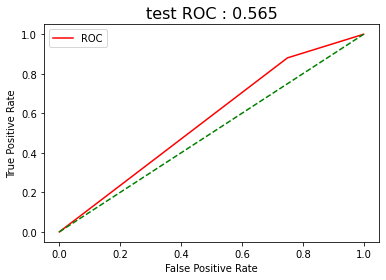

train_roc_auc score:  1.0
test_roc_auc score:  0.5654147406724725 

train_f1 score:  1.0
test_f1 score:  0.13162939297124598 

train_recall score:  1.0
test_recall score:  0.8803418803418803 

train_pre score:  1.0
test_pre score:  0.07113259668508287 

train acc score:  1.0
test acc score:  0.28904002092597436 



In [27]:
from sklearn.tree import DecisionTreeClassifier
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
dt_clf_time = time.time()

dt_clf = DecisionTreeClassifier(random_state=42)

trained_model = dt_clf.fit(X_train_under,y_train_under)
train_pred = trained_model.predict(X_train_under)
train_prob = trained_model.predict_proba(X_train_under)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_under, y_test, train_pred, test_pred, train_prob, test_prob)

## Random Forest

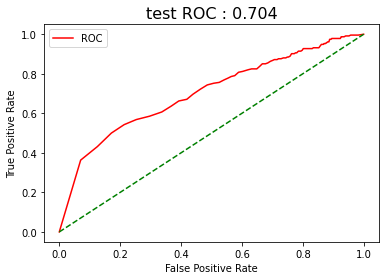

train_roc_auc score:  1.0
test_roc_auc score:  0.5604047743223001 

train_f1 score:  1.0
test_f1 score:  0.12979172955025656 

train_recall score:  1.0
test_recall score:  0.9188034188034188 

train_pre score:  1.0
test_pre score:  0.06982786619032154 

train acc score:  1.0
test acc score:  0.24588019879675646 



In [28]:
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
rf_clf_time = time.time()

rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

trained_model = rf_clf.fit(X_train_under, y_train_under,)

train_pred = trained_model.predict(X_train_under)
train_prob = trained_model.predict_proba(X_train_under)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_under, y_test, train_pred, test_pred, train_prob, test_prob)

## GB Classifier

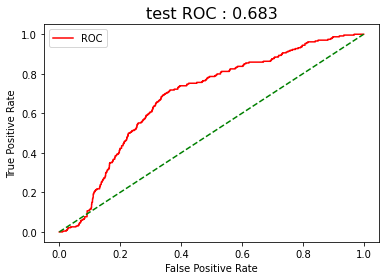

train_roc_auc score:  0.9780114722753345
test_roc_auc score:  0.5830154103349979 

train_f1 score:  0.9776915615906887
test_f1 score:  0.13708609271523178 

train_recall score:  0.9636711281070746
test_recall score:  0.8846153846153846 

train_pre score:  0.9921259842519685
test_pre score:  0.07430007178750897 

train acc score:  0.9780114722753346
test acc score:  0.3183363850379283 



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
gb_clf_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=42)

trained_model = gb_clf.fit(X_train_under, y_train_under,)

train_pred = trained_model.predict(X_train_under)
train_prob = trained_model.predict_proba(X_train_under)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_under, y_test, train_pred, test_pred, train_prob, test_prob)

## LightGBM

[5]	valid_0's auc: 0.735795	valid_0's binary_logloss: 0.813893
[10]	valid_0's auc: 0.760091	valid_0's binary_logloss: 0.905243
[15]	valid_0's auc: 0.745638	valid_0's binary_logloss: 1.07076
[20]	valid_0's auc: 0.734789	valid_0's binary_logloss: 1.22765
[25]	valid_0's auc: 0.740272	valid_0's binary_logloss: 1.35781


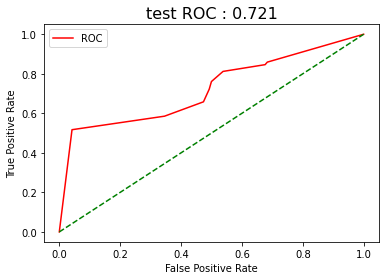

train_roc_auc score:  0.8766730401529637
test_roc_auc score:  0.5877485336248223 

train_f1 score:  0.8700906344410876
test_f1 score:  0.139196675900277 

train_recall score:  0.8260038240917782
test_recall score:  0.8589743589743589 

train_pre score:  0.9191489361702128
test_pre score:  0.07573474001507159 

train acc score:  0.8766730401529637
test acc score:  0.34972534658645044 

---0.4318375587463379 seconds ---


In [30]:
import lightgbm
from lightgbm import LGBMClassifier
import os
import time

start_time=time.time()

model = LGBMClassifier(
                        learning_rate=0.1, 
                        num_iterations = 1000, # n_estimator 랑 같은 것 같음
                        max_depth = 4,
                        n_jobs=-1,
                        boost_from_average=False)

trained_model = model.fit(X_train_under,y_train_under, 
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=25, 
        verbose = 5, 
        eval_metric = 'auc')

train_pred = trained_model.predict(X_train_under)
train_prob = trained_model.predict_proba(X_train_under)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_under, y_test, train_pred, test_pred, train_prob, test_prob)
# confusion_matrix(y_test, test_pred)
print("---%s seconds ---" % (time.time() - start_time))

## XGB Classifier

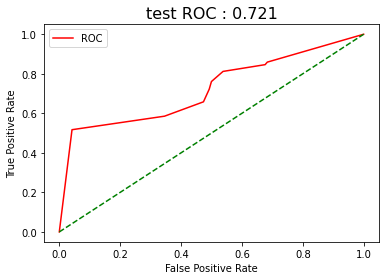

train_roc_auc score:  0.8766730401529637
test_roc_auc score:  0.5877485336248223 

train_f1 score:  0.8700906344410876
test_f1 score:  0.139196675900277 

train_recall score:  0.8260038240917782
test_recall score:  0.8589743589743589 

train_pre score:  0.9191489361702128
test_pre score:  0.07573474001507159 

train acc score:  0.8766730401529637
test acc score:  0.34972534658645044 



In [31]:
from xgboost import XGBClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
xgb_clf_time = time.time()

xgb_clf = XGBClassifier(n_estimator=300, learning_rate=0.1, max_depth=5)

xtrained_model = gb_clf.fit(X_train_under, y_train_under,)

train_pred = trained_model.predict(X_train_under)
train_prob = trained_model.predict_proba(X_train_under)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_under, y_test, train_pred, test_pred, train_prob, test_prob)

## KNN

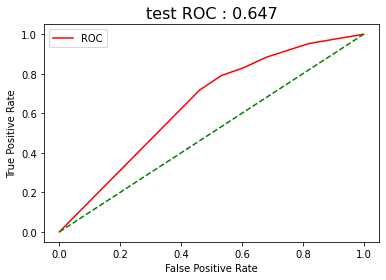

train_roc_auc score:  0.8977055449330783
test_roc_auc score:  0.6130531800634894 

train_f1 score:  0.8884254431699687
test_f1 score:  0.14969135802469136 

train_recall score:  0.8145315487571702
test_recall score:  0.8290598290598291 

train_pre score:  0.9770642201834863
test_pre score:  0.08227311280746395 

train acc score:  0.8977055449330784
test acc score:  0.42348940622547737 



In [32]:
from sklearn.neighbors import KNeighborsClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
knn_clf_time = time.time()

knn_clf = KNeighborsClassifier()

trained_model = knn_clf.fit(X_train_under, y_train_under,)

train_pred = trained_model.predict(X_train_under)
train_prob = trained_model.predict_proba(X_train_under)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_under, y_test, train_pred, test_pred, train_prob, test_prob)

## GaussianNB

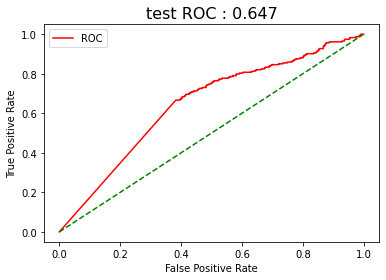

train_roc_auc score:  0.8871892925430211
test_roc_auc score:  0.5743255150471647 

train_f1 score:  0.874468085106383
test_f1 score:  0.13497773210003428 

train_recall score:  0.7858508604206501
test_recall score:  0.8418803418803419 

train_pre score:  0.9856115107913669
test_pre score:  0.07337057728119181 

train acc score:  0.887189292543021
test acc score:  0.33952393408318077 



In [33]:
from sklearn.naive_bayes import GaussianNB
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
nb_clf_time = time.time()

nb_clf = GaussianNB()

trained_model = nb_clf.fit(X_train_under, y_train_under,)

train_pred = trained_model.predict(X_train_under)
train_prob = trained_model.predict_proba(X_train_under)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_under, y_test, train_pred, test_pred, train_prob, test_prob)

## SVC

In [34]:
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 학습/예측/평가
svc_clf_time = time.time()

svc_clf = SVC()

trained_model = svc_clf.fit(X_train_under, y_train_under,)

train_pred = trained_model.predict(X_train_under)
train_prob = trained_model.predict_proba(X_train_under)[:, 1]

test_pred = trained_model.predict(X_test)
test_prob = trained_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train_under, y_test, train_pred, test_pred, train_prob, test_prob)

AttributeError: predict_proba is not available when  probability=False